

*   NAME: GOUTHAM R
*   SCHOOL: CDS
*   EMAIL: goutham.r-26@scds.saiuniversity.edu.in





In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing import image_dataset_from_directory

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import os
import glob
import PIL
from PIL import Image

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Dataset Path
dataset_path = "/content/drive/MyDrive/Ornamental_Plants"

In [ ]:
# Load and Preprocess Dataset
img_size = (299, 299)  # Resizing as per the requirements of InceptionResNetV2
X = []
y = []

#Using glob and os to load images and read directories
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):  #
        for img_file in glob.glob(os.path.join(class_path, "*.jpg")) + glob.glob(os.path.join(class_path, "*.jpeg")):
            img = Image.open(img_file).resize(img_size)  #
            img = np.array(img) / 255.0  # Normalising the pixel values to [0, 1]
            X.append(img)
            y.append(class_folder)

# Converting into numpy arrays
X = np.array(X)
y = np.array(y)

#label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Display class names and the number of flowers in each class
class_names = label_encoder.classes_
print("Class Names and Counts:")
for class_name in class_names:
    print(f"{class_name}: {np.sum(y == label_encoder.transform([class_name])[0])}")
print(f"Total images: {len(X)}")



Class Names and Counts:
Damask Rose: 500
Echeveria Flower: 500
Mirabilis Jalapa: 500
Rain Lily: 498
Zinnia Elegans: 400
Total images: 2398


In [ ]:
#75 percent train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
#No of training and testing images
print("Dataset Split:")
print(f"Total images: {len(X)}")
print(f"Training images: {len(X_train)}")
print(f"Testing images: {len(X_test)}")

Dataset Split:
Total images: 2398
Training images: 1798
Testing images: 600


In [ ]:
# Standardizing X_train and X_test

mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std
X_test_std = (X_test-mu)/std

In [ ]:

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Classes: {class_names}")

X_train shape: (1798, 299, 299, 3)
X_test shape: (600, 299, 299, 3)
Classes: ['Damask Rose' 'Echeveria Flower' 'Mirabilis Jalapa' 'Rain Lily'
 'Zinnia Elegans']


In [ ]:

#Pretrained Model load
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base model layers

#BN and dropout layer with 25 percent dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
callbacks1_TL = [
    tf.keras.callbacks.ModelCheckpoint(
        "bestTL1.weights.h5",
        monitor='val_accuracy',
        save_weights_only=True,
        save_best_only=True
    )
]


In [ ]:
# Train the model
history = model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=16,
    callbacks=callbacks1_TL
)


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 63s 335ms/step - accuracy: 0.7877 - loss: 0.6688 - val_accuracy: 0.9833 - val_loss: 0.1749
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.9981 - loss: 0.0209 - val_accuracy: 1.0000 - val_loss: 0.0371
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9969 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9997 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 7.6060e-04
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 6.8517e-04
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 1.0000 - loss: 0.0022 

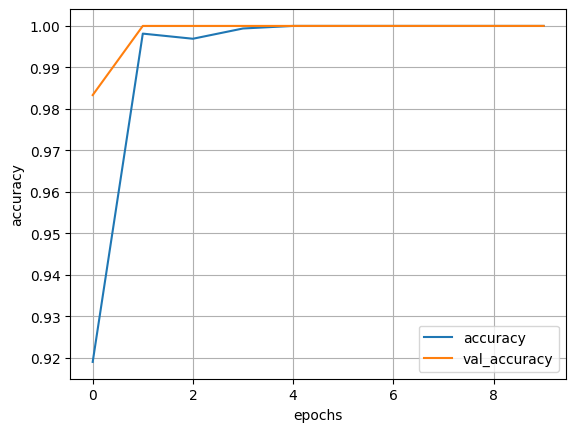

In [ ]:
#training and val graph
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
#model evaluation
testLoss_TL, testAccuracy_TL = model.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 683ms/step - accuracy: 0.9956 - loss: 0.0203
Test-loss: 0.022503, Test-accuracy: 0.995000


In [ ]:
#loading the best weights
model.load_weights("bestTL1.weights.h5")

testLoss_TL, testAccuracy_TL = model.evaluate(x=X_test, y=y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 1.0000 - loss: 0.0293
Test-loss: 0.027381, Test-accuracy: 1.000000


In [ ]:
y_proba = model.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 609ms/step
[1 2 1 2 3 3 3 1 0 1 0 1 3 4 1 2 2 3 1 4 3 4 1 4 1 2 2 3 0 2 1 1 3 1 1 4 3
 1 0 0 4 0 4 4 2 4 2 1 4 3 4 1 0 4 2 0 4 1 2 0 1 2 4 3 0 0 3 2 4 2 0 3 2 2
 4 3 1 2 4 0 1 2 3 1 0 0 2 1 4 3 0 0 0 1 3 3 0 3 4 1 2 4 0 0 4 1 3 1 4 2 1
 3 1 2 2 1 2 4 2 1 2 2 4 2 3 0 4 0 2 2 3 0 4 0 2 1 3 0 0 2 3 2 0 2 2 2 1 3
 3 0 3 1 3 3 3 0 0 2 2 3 0 1 2 0 3 3 0 3 4 1 1 2 0 3 2 4 2 4 3 2 3 4 2 3 4
 1 4 2 4 0 1 1 1 1 1 1 1 4 4 0 0 4 1 4 0 2 0 4 2 1 4 2 3 4 1 4 3 3 3 4 0 4
 4 0 2 0 0 3 1 3 2 1 3 1 2 2 4 1 1 4 3 4 3 0 2 0 4 3 2 3 0 2 1 3 3 2 1 4 3
 0 0 0 0 3 2 0 2 1 0 1 4 1 2 2 3 3 4 2 0 3 1 2 4 0 1 0 1 4 4 2 1 2 3 2 1 1
 1 1 3 2 3 0 2 2 2 0 2 3 1 0 3 3 1 0 3 0 3 3 3 0 2 1 4 2 1 0 2 1 0 3 4 2 4
 0 3 2 0 3 0 4 1 2 3 0 1 2 3 2 4 1 0 4 0 4 4 0 4 1 1 3 4 2 2 3 3 0 1 2 3 1
 2 1 1 0 3 2 2 1 3 1 4 2 0 0 1 3 1 3 3 1 1 2 0 0 2 4 2 2 3 2 2 3 4 4 1 4 3
 4 3 3 0 4 2 4 4 1 2 0 2 4 3 4 1 1 2 3 2 2 3 3 2 3 3 0 1 0 3 1 4 3 2 3 3 1
 4 1 0 4 4 0 1 2 2 0 2 3 0 1 1 1 3 3 0 4 1 4 3 2 0 0 2 0 3

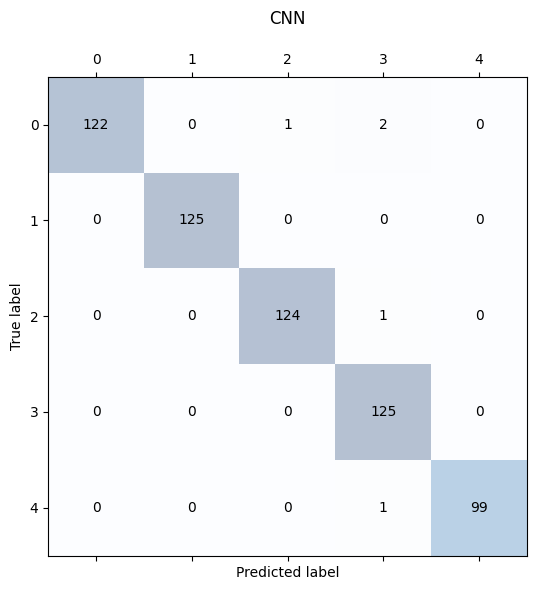

{0, 1, 2, 3, 4}
['Damask Rose' 'Echeveria Flower' 'Mirabilis Jalapa' 'Rain Lily'
 'Zinnia Elegans']


In [ ]:
#generating confusion matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(set(y))
print(label_encoder.classes_)


In [ ]:
#precision, recall and f1-score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9918733850129199
Recall:  0.9916666666666667
F1-score:  0.9916846081278271






In [ ]:
# Saves the best model in the `.keras` format
model.save('/content/drive/MyDrive/model 1/tl1.keras')


In [ ]:
#saving the model weights
from numpy import save

save('/content/drive/MyDrive/model 1/X_train_std.npy', X_train_std)
save('/content/drive/MyDrive/model 1/X_test_std.npy', X_test_std)

save('/content/drive/MyDrive/model 1/y_train.npy', y_train)
save('/content/drive/MyDrive/model 1/y_test.npy', y_test)